<a href="https://colab.research.google.com/github/quoctrungsz27/week10/blob/main/week10_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt

In [2]:
(x_trains, y_trains),(x_tests, y_tests) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


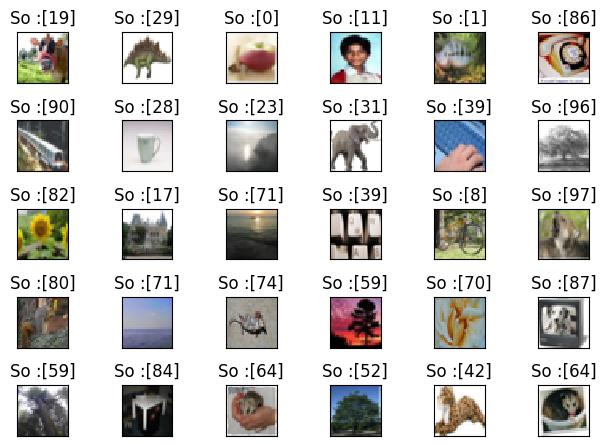

In [3]:

for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_trains[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_trains[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
x_trains = x_trains.reshape((50000, 32,32,3))
x_trains = x_trains.astype('float32')/255

x_tests = x_tests.reshape((10000, 32,32,3))
x_tests = x_tests.astype('float32')/255

from keras.utils import to_categorical
y_trains = to_categorical(y_trains, 100)
y_tests = to_categorical(y_tests, 100)

In [5]:

#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epoch = 20
classes = 100

In [6]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'linear', input_shape= (32,32,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 1))
model.add(MaxPooling2D((2,2), padding= 'same'))

#ANN
model.add(Flatten())
model.add(Dense(128, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [8]:
from keras.backend import categorical_crossentropy
model.compile(loss= categorical_crossentropy, optimizer= Adam(), metrics= ['accuracy'])
train = model.fit(x_trains, y_trains, batch_size= 64, epochs= 5, verbose= 1)

Epoch 1/5
782/782 [==============================] - 132s 168ms/step - loss: 2.3357 - accuracy: 0.3982
Epoch 2/5
782/782 [==============================] - 130s 166ms/step - loss: 2.0945 - accuracy: 0.4508
Epoch 3/5
782/782 [==============================] - 130s 166ms/step - loss: 1.8877 - accuracy: 0.4994
Epoch 4/5
782/782 [==============================] - 130s 166ms/step - loss: 1.7054 - accuracy: 0.5387
Epoch 5/5
782/782 [==============================] - 132s 169ms/step - loss: 1.5181 - accuracy: 0.5844


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
test_loss, test_acc = model.evaluate(x_trains,y_trains)
print("Accurency:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Colab Notebooks/week10_AI/CIFAR100_CNN.h5')

1563/1563 [==============================] - 49s 32ms/step - loss: 1.2495 - accuracy: 0.6540
Accurency: 0.653980016708374
Loss: 1.2495131492614746


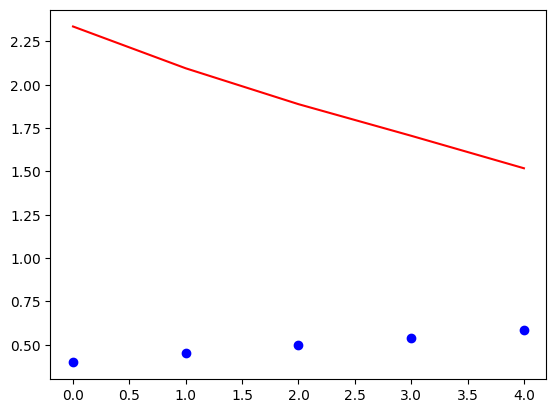

In [11]:
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [13]:
from keras.models import load_model
model100 = load_model('/content/drive/MyDrive/Colab Notebooks/week10_AI/CIFAR100_CNN.h5')

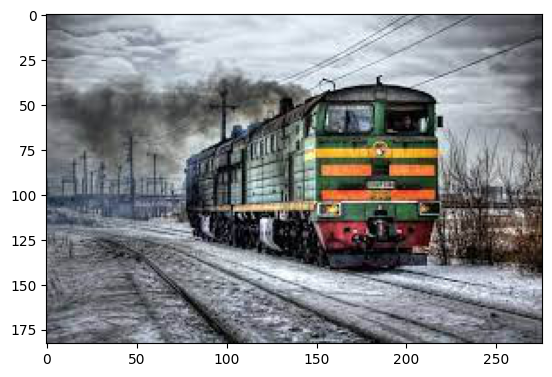

In [15]:

from keras.utils import load_img, img_to_array
from matplotlib import pyplot as plt
url = '/content/drive/MyDrive/Colab Notebooks/week10_AI/train.jpg'
img = load_img(url)
plt.imshow(img)
plt.show()

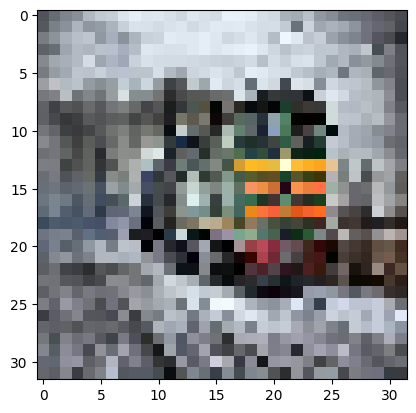

In [16]:

img = load_img(url, target_size= (32,32,3))
plt.imshow(img)

In [17]:

img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255

import numpy as np
np.argmax(model100.predict(img), axis = 1)

1/1 [==============================] - 0s 139ms/step


array([7])